In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b = 3.0
T = 10000
N_values = [10,20,50,100,200,500,800,1000]

In [3]:
mQ2 =[]
mRg2=[]
for N in N_values:
    x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))
    filename = "simulation_FJC_b=3.0_N={}_T=10000.xyz".format(N)
    with open(filename, 'r') as file:
        for t in range(T):
            file.readline()
            file.readline()
            for n in range(N+1):
                data = file.readline()
                x[t,n] = float(data.split()[1])
                y[t,n] = float(data.split()[2])
                z[t,n] = float(data.split()[3])  
    Q_N=[];Rg_N=[]
    for t in range(T):
        Q_N.append(np.sqrt((x[t,-1]-x[t,0])**2+(y[t,-1]-y[t,0])**2+(z[t,-1]-z[t,0])**2))
        Rcm = [np.mean(x[t,:]),np.mean(y[t,:]),np.mean(z[t,:])]
        Rg_N.append(np.sqrt(np.mean((x[t,:]-Rcm[0])**2 + (y[t,:]-Rcm[1])**2 + (z[t,:]-Rcm[2])**2)))
        #results.append({'N':N,'Q':Q_N,'Rg':Rg_N})
    mQ2_sim=np.mean(np.array(Q_N)**2)
    mQ2.append(mQ2_sim)
    mRg2_sim=np.mean(np.array(Rg_N)**2)
    mRg2.append(mRg2_sim)
    
    
    


In [4]:
mRg2

[16.33346670694215,
 31.44716626116145,
 76.35785300768566,
 100.7037506919002,
 301.9538618498676,
 751.8240606251651,
 1203.1643428579257,
 1507.9394381678019]

In [5]:
np.mean(mRg2)

498.71549252105626

In [6]:
N_values

[10, 20, 50, 100, 200, 500, 800, 1000]

Text(0, 0.5, 'mean Q^2 values')

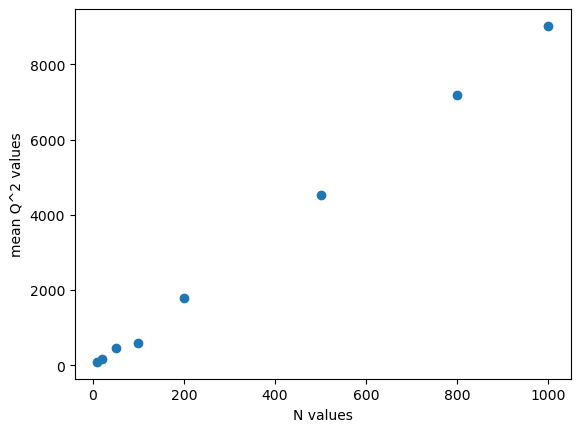

In [7]:
plt.scatter(N_values,mQ2)
plt.xlabel('N values')
plt.ylabel('mean Q^2 values')

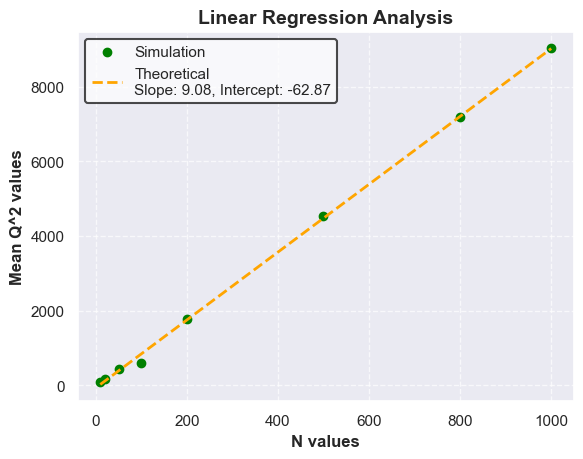

In [8]:
# Perform linear regression
import seaborn as sns
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(N_values, mQ2)
regression_line = slope * np.array(N_values) + intercept
sns.set(style='darkgrid')
colors = sns.color_palette("viridis", len(N_values))
plt.scatter(N_values, mQ2, label='Simulation', color = 'green', marker='o')
plt.plot(N_values, regression_line, color='orange', linestyle='--', linewidth=2, label=f'Theoretical\nSlope: {slope:.2f}, Intercept: {intercept:.2f}')
plt.xlabel('N values', fontsize=12, fontweight='bold')
plt.ylabel('Mean Q^2 values', fontsize=12, fontweight='bold')
plt.title('Linear Regression Analysis', fontsize=14, fontweight='bold')
legend = plt.legend(loc='upper left', frameon=True, facecolor='white', edgecolor='black', framealpha=0.7)
legend.get_frame().set_linewidth(1.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [9]:
np.sqrt(9.08)

3.0133038346638727

Text(0, 0.5, 'mean Rg^2 values')

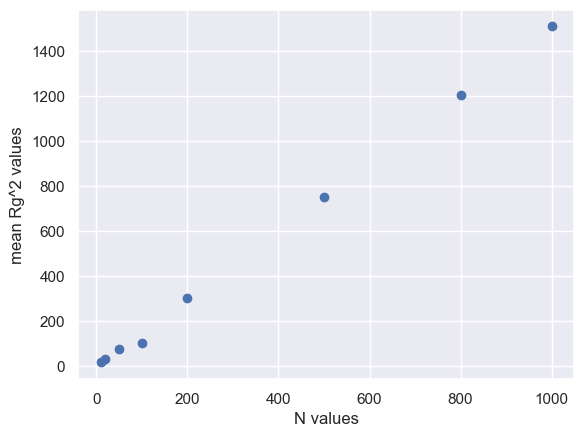

In [10]:
plt.scatter(N_values,mRg2)
plt.xlabel('N values')
plt.ylabel('mean Rg^2 values')

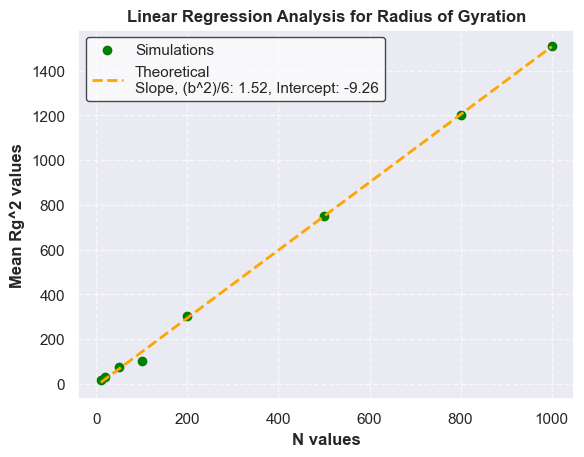

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(N_values, mRg2)
regression_line = slope * np.array(N_values) + intercept

sns.set(style='darkgrid')
plt.scatter(N_values, mRg2, label='Simulations', color='green', marker='o')
plt.plot(N_values, regression_line, color='orange', linestyle='--', linewidth=2, label=f'Theoretical\nSlope, (b^2)/6: {slope:.2f}, Intercept: {intercept:.2f}')
plt.xlabel('N values',fontweight='bold')
plt.ylabel('Mean Rg^2 values',fontweight='bold')
plt.title('Linear Regression Analysis for Radius of Gyration',fontweight='bold')
legend = plt.legend(loc='upper left', frameon=True, facecolor='white', framealpha=0.7)
legend.get_frame().set_edgecolor('black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [12]:
bond_length= np.sqrt(6*1.52)
bond_length

3.0199337741083